In [1]:
# import python packages
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pybeam.custom as pbc

# set directory where your model's .so/.pyd file is located at
model_dir = '/Users/matthewmurrow/Documents/phd_research/pybeam_custom_models/ugm_drift_flipping'

# modify figure text settings
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams.update({ 'mathtext.default' : 'regular' })


In [16]:
# parameters for data set 0
phi0 = {'phi[0]' : 0.25, # phi[0]: non-decision time
        'phi[1]' : 0.5,  # phi[1]: relative start point
        'phi[2]' : 0.5,  # phi[2]: drift rate
        'phi[3]' : 3.0,  # phi[3]: leakage rate
        'phi[4]' : 1.0,  # phi[4]: k
        'phi[5]' : 1.0,  # phi[5]: diffusion rate
        'phi[6]' : 1.0,  # phi[6]: boundary start
        'phi[7]' : 0.5}  # phi[7]: drift flipping time

# parameters for data set 1
phi1 = {'phi[0]' : 0.25, # phi[0]: non-decision time
        'phi[1]' : 0.5,  # phi[1]: relative start point
        'phi[2]' : 2.0,  # phi[2]: drift rate
        'phi[3]' : 3.0,  # phi[3]: leakage rate
        'phi[4]' : 1.0,  # phi[4]: k
        'phi[5]' : 1.0,  # phi[5]: diffusion rate
        'phi[6]' : 1.0,  # phi[6]: boundary start
        'phi[7]' : 0.5}  # phi[7]: drift flipping time

# simulate data for parameter set 0
seed0 = 123
rt0 = pbc.simulate_model(model_dir = model_dir, # directory the model file is in
                               phi = phi0,      # dictionary of model parameters
                            N_sims = 500,       # number of simulated data points
                              seed = seed0)     # rng seed  

# simulate data for parameter set 1
seed1 = 456
rt1 = pbc.simulate_model(model_dir = model_dir, # directory the model file is in
                               phi = phi1,      # dictionary of model parameters
                            N_sims = 500,       # number of simulated data points
                              seed = seed1)     # rng seed


(-2.0, 2.0)

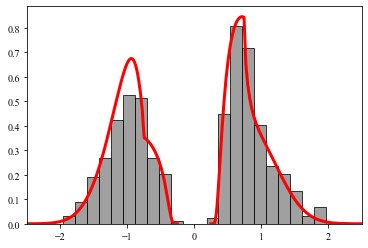

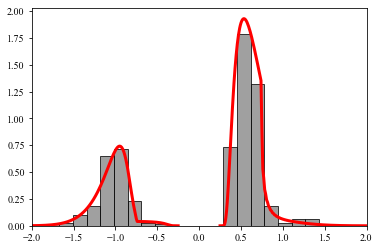

In [17]:
# plot data and model for parameter set 0
pbc.plot_rt( model_dir = model_dir, # directory the model file is in
                        phi = phi0, # dictionary of model parameters
                         rt = rt0); # dictionary of rt data

plt.xlim(-2.5, 2.5)

# plot data and model for parameter set 1
pbc.plot_rt( model_dir = model_dir, # directory our model file is in
                        phi = phi1, # dictionary of model parameters
                         rt = rt1); # dictionary of rt data

plt.xlim(-2.0, 2.0)


In [18]:
# define model priors
p = {'pphi[0]' : 'Uniform("t_nd", lower = 0.0, upper = 1.0)', # prior for phi[0]: non-decision time
     'pphi[1]' : 'Uniform("w", lower = 0.25, upper = 0.75)',  # prior for phi[1]: relative start point
    'pphi[2]0' : 'Uniform("mu0", lower = -5.0, upper = 5.0)', # prior for phi[2]: drift rate for condition 0
    'pphi[2]1' : 'Uniform("mu1", lower = -5.0, upper = 5.0)', # prior for phi[2]: drift rate for condition 1
     'pphi[3]' : 'Uniform("l", lower = 0.0, upper = 10.0)',   # prior for phi[3]: leakage
     'pphi[4]' : 'Uniform("k", lower = 0.0, upper = 5.0)',    # prior for phi[4]: urgency
     'pphi[5]' : 1.0,                                         # value for phi[5]: sigma
     'pphi[6]' : 'Uniform("a", lower = 0.25, upper = 2.5)',   # prior for phi[6]: boundary start
     'pphi[7]' : 0.5}                                         # value for phi[5]: drift flip time

# define model conditions
c0 = {'rt': rt0,        # dictionary cotaining the rt data
 'phi[0]' : 'pphi[0]',  # sets prior used for non-decision time, references p['pphi[0]']
 'phi[1]' : 'pphi[1]',  # sets prior used for relative start, references p['pphi[1]']
 'phi[2]' : 'pphi[2]0', # sets prior used for drift rate, references p['pphi[2]0']
 'phi[3]' : 'pphi[3]',  # sets prior used for leakage rate, references p['pphi[3]']
 'phi[4]' : 'pphi[4]',  # sets prior used for urgency, references p['pphi[4]']
 'phi[5]' : 'pphi[5]',  # sets sigma, references p['pphi[5]']
 'phi[6]' : 'pphi[6]',  # sets prior used for threhsold location, references p['pphi[6]']
 'phi[7]' : 'pphi[7]'}  # sets prior used for drift flip time, references p['pphi[7]']
         
c1 = {'rt': rt1,        # dictionary cotaining the rt data
 'phi[0]' : 'pphi[0]',  # sets prior used for non-decision time, references p['pphi[0]']
 'phi[1]' : 'pphi[1]',  # sets prior used for relative start, references p['pphi[1]']
 'phi[2]' : 'pphi[2]1', # sets prior used for drift rate, references p['pphi[2]0']
 'phi[3]' : 'pphi[3]',  # sets prior used for leakage rate, references p['pphi[3]']
 'phi[4]' : 'pphi[4]',  # sets prior used for urgency, references p['pphi[4]']
 'phi[5]' : 'pphi[5]',  # sets sigma, references p['pphi[5]']
 'phi[6]' : 'pphi[6]',  # sets prior used for threhsold location, references p['pphi[6]']
 'phi[7]' : 'pphi[7]'}  # sets prior used for drift flip time, references p['pphi[7]']

# dictionary containing model conditions
cond = { 0 : c0 , 1 : c1 }

# parameter inference
trace = pbc.inference(model_dir = model_dir,            # directory the model file is in
                         priors = p,                    # priors dictionary
                     conditions = cond,                 # conditions dictionary 
                        samples = 50000,                # number of samples completed per chain
                         chains = 3,                    # number of MCMC chains to run
                          cores = 3,                    # number of cpu cores to run chains on
                      file_name = 'ugm_drift_flipping') # name for output file


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [a, k, l, mu1, mu0, w, t_nd]


Sampling 3 chains for 0 tune and 50_000 draw iterations (0 + 150_000 draws total) took 112 seconds.


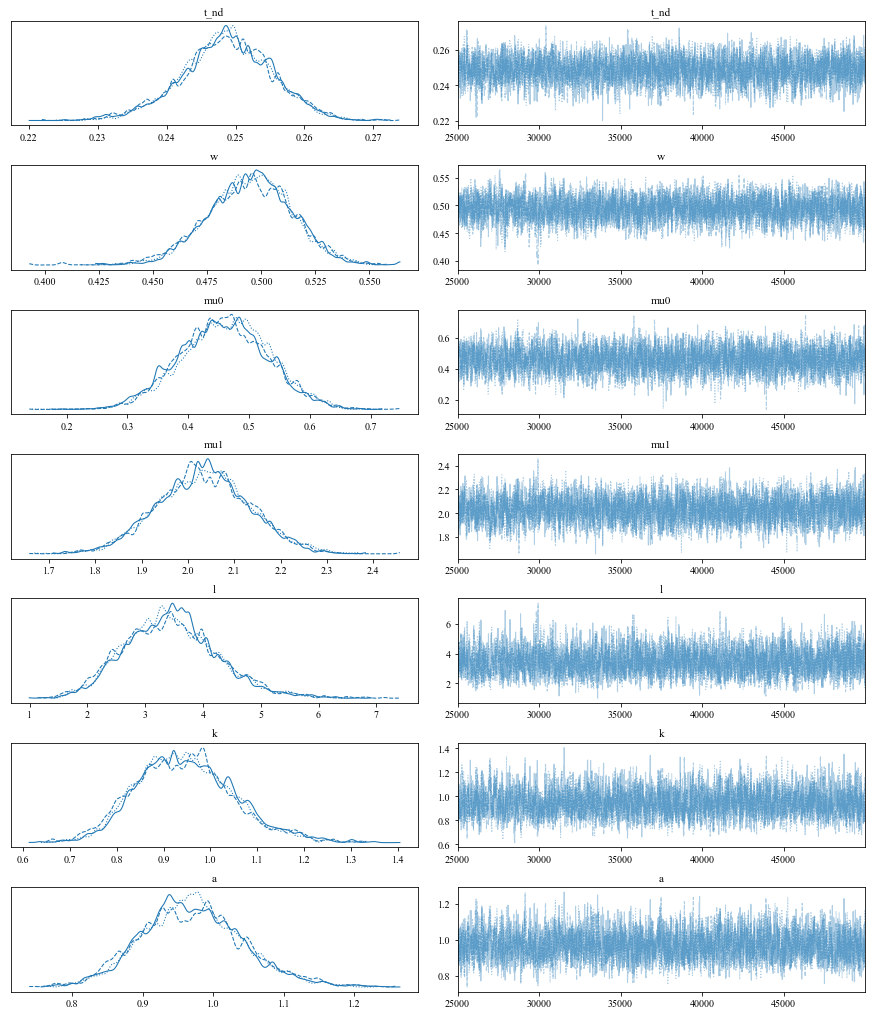

In [22]:
# plot trace
pbc.plot_trace(file_name = 'ugm_drift_flipping', burnin = 25000, combine_chains = False);


In [20]:
# simulate 25,000 data points for each parameter set for plotting
rt_val0 = pbc.simulate_model(model_dir = model_dir, phi = phi0, N_sims = 25000)
rt_val1 = pbc.simulate_model(model_dir = model_dir, phi = phi1, N_sims = 25000)


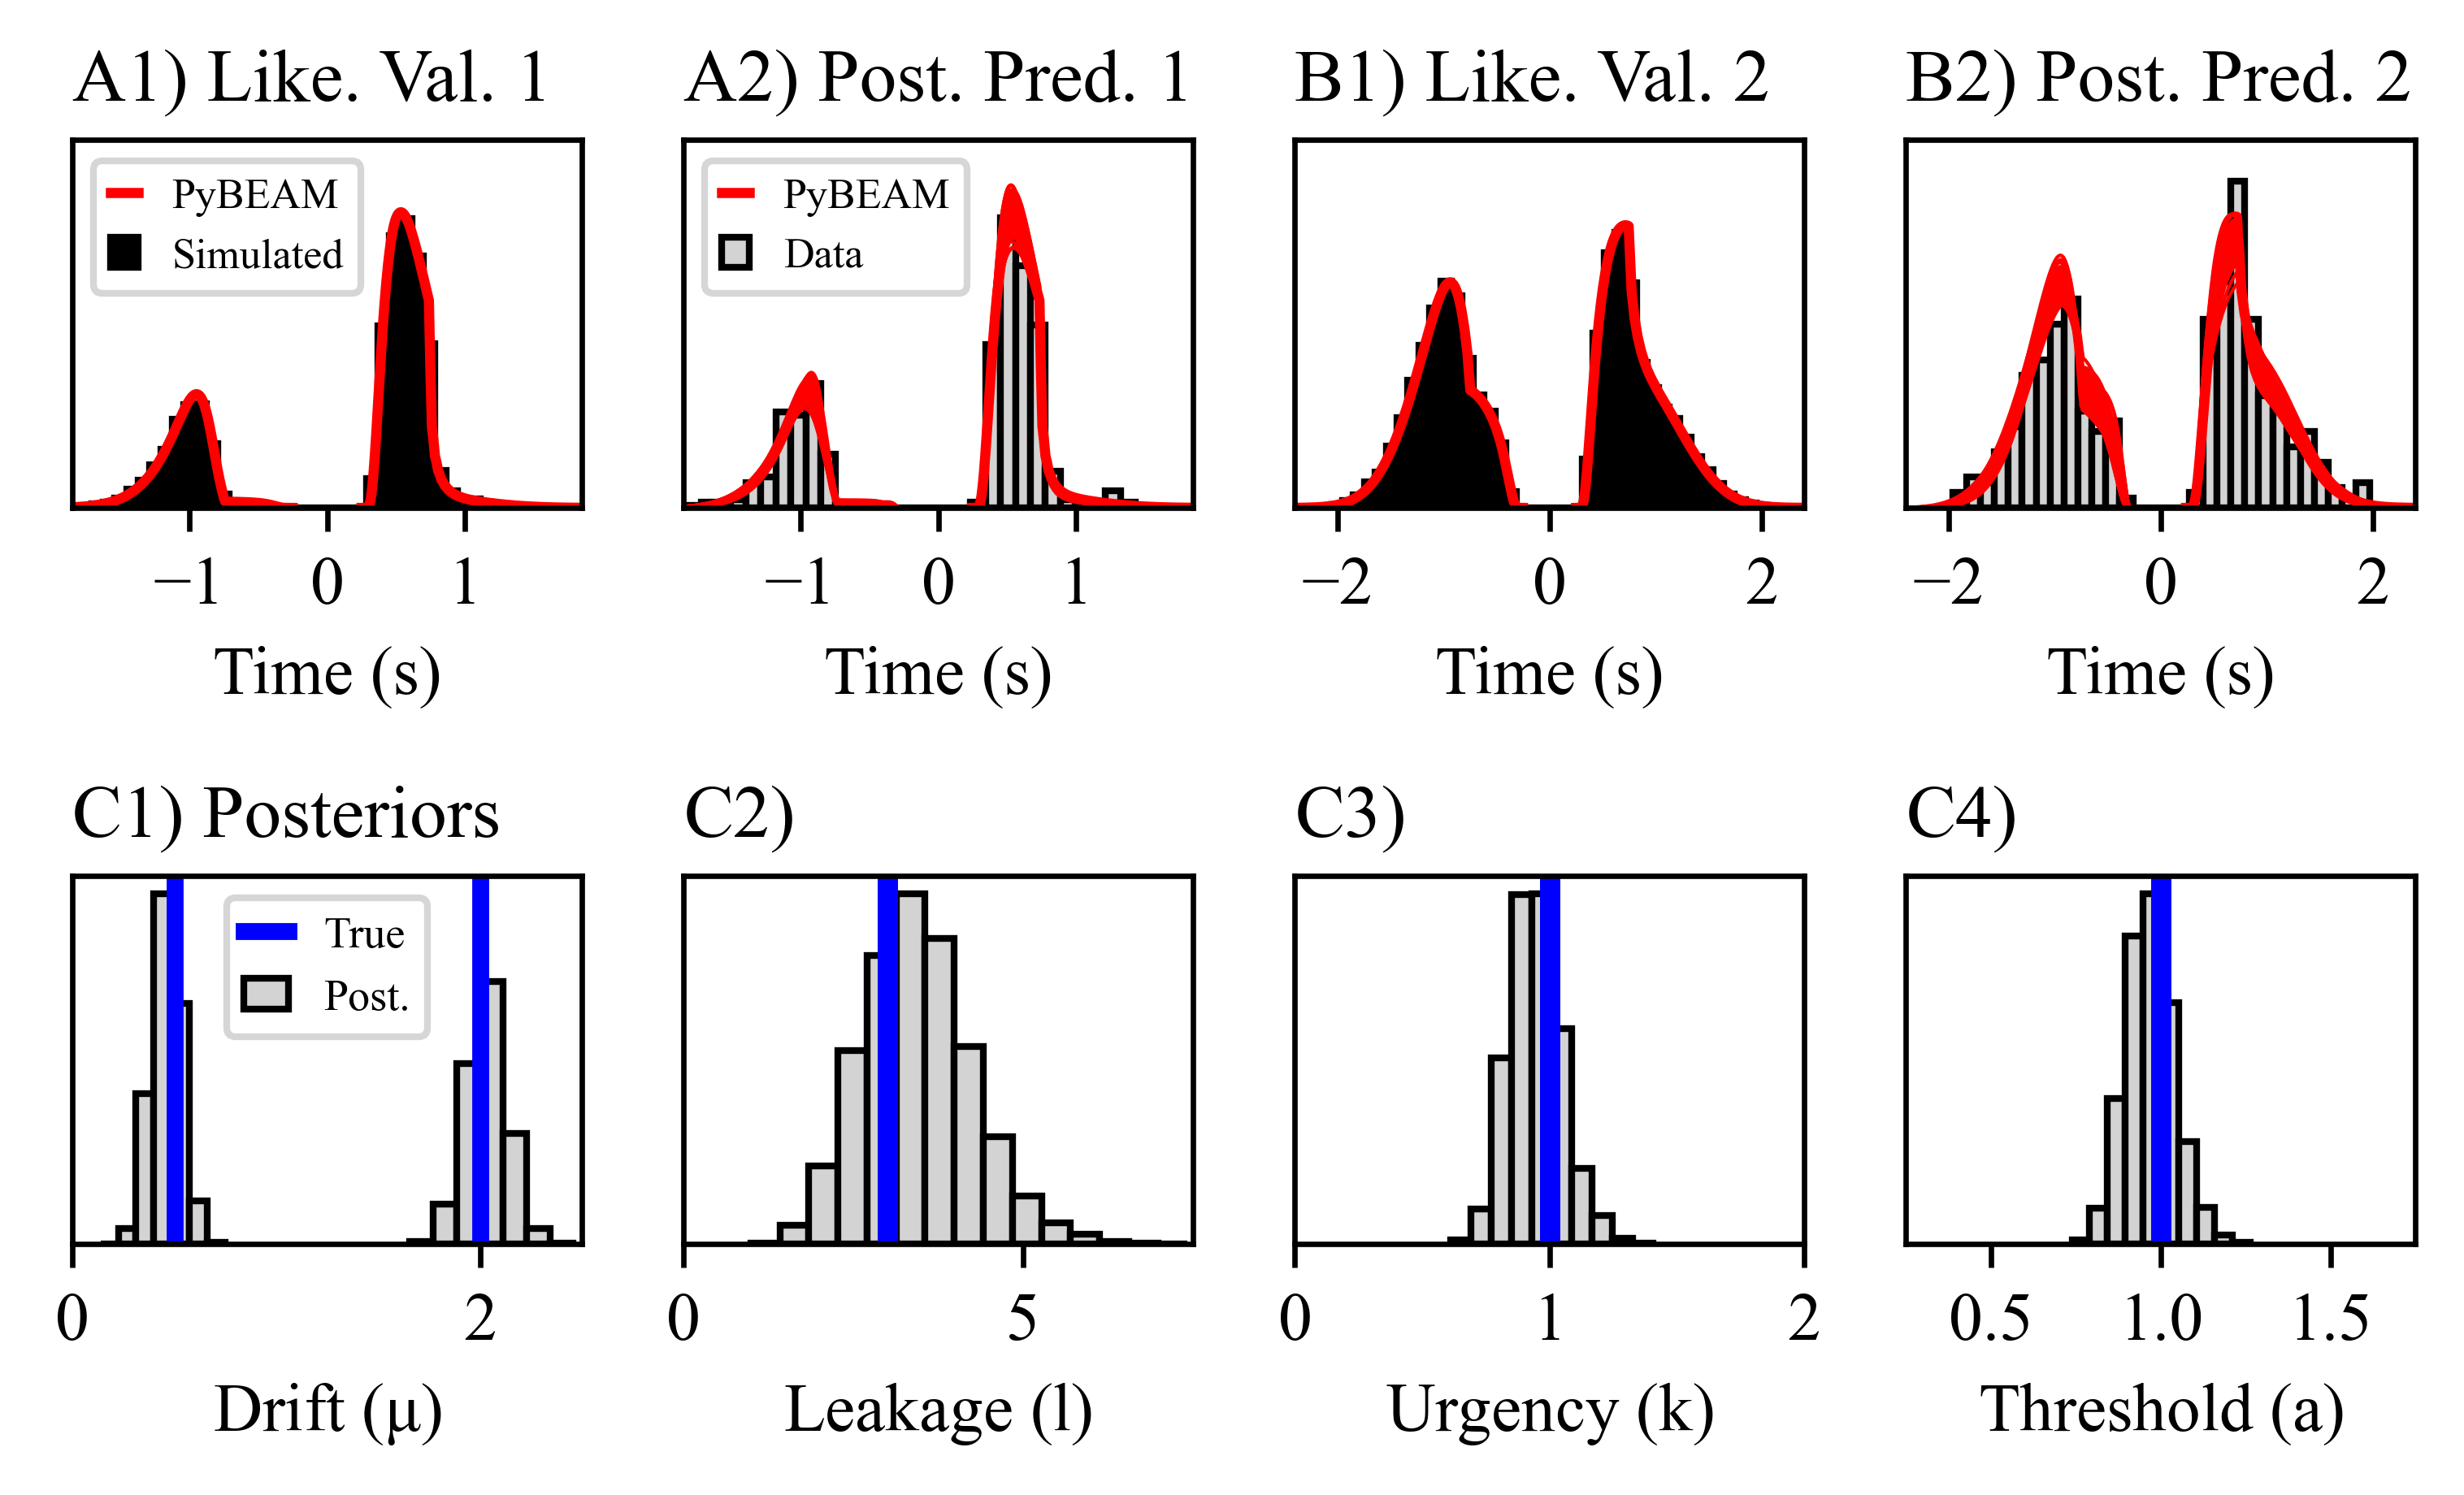

In [27]:
# define figure
fig, axs = plt.subplots(2, 4, figsize=(6.2, 3.0), dpi=600);
plt.subplots_adjust(hspace=1.0)

# import trace data
file_name = 'ugm_drift_flipping'
burnin = 25000
trace = az.from_netcdf(file_name + '.nc')
trace = trace.sel(draw=slice(burnin,None))
trace = trace.posterior.stack(draws=("chain", "draw"))

t_nd = trace.t_nd.values
w = trace.w.values
mu0 = trace.mu0.values
mu1 = trace.mu1.values
l = trace.l.values
k = trace.k.values
a = trace.a.values

# -------------------------------------------------- #
# generate panel [0,0]
# -------------------------------------------------- #

model_rt = pbc.model_rt(model_dir = model_dir, phi = phi1)
axs[0,0].plot(model_rt['time'], model_rt['model_rt_upper'], color = 'r')
axs[0,0].plot(-model_rt['time'], model_rt['model_rt_lower'], color = 'r', label = '_nolegend_')

rt_val_all = np.concatenate((rt_val1['rt_upper'], -rt_val1['rt_lower']))
axs[0,0].hist(rt_val_all, density = True, bins = 50, edgecolor = 'k', facecolor = 'black');
axs[0,0].set_xlim(-1.85, 1.85)
axs[0,0].set_ylim(0.0, 2.4)
axs[0,0].set_title('A1) Like. Val. 1', loc = 'left', fontsize = 11)
axs[0,0].set_xlabel('Time (s)')
axs[0,0].legend(['PyBEAM', 'Simulated'], fontsize = 6.25, handlelength = 0.65, loc = 'upper left')

# -------------------------------------------------- #
# generate panel [0,1]
# -------------------------------------------------- #

rt1_all = np.concatenate((rt1['rt_upper'], -rt1['rt_lower']))
axs[0,1].hist(rt1_all, density = True, bins = 30, edgecolor = 'k', facecolor = 'lightgrey');

N_pp = 100
for ii in range(N_pp):
    
    ind = np.random.randint(0, len(t_nd))
    t_nd_ind = t_nd[ind]
    w_ind = w[ind]
    mu_ind = mu1[ind]
    l_ind = l[ind]
    k_ind = k[ind]
    a_ind = a[ind] 

    phi_temp = {'phi[0]' : t_nd_ind,
                'phi[1]' : w_ind,
                'phi[2]' : mu_ind,
                'phi[3]' : l_ind,
                'phi[4]' : k_ind,    
                'phi[5]' : 1.0,
                'phi[6]' : a_ind,
                'phi[7]' : 0.5} 
       
    rt_model = pbc.model_rt(model_dir = model_dir, phi = phi_temp)
    if (ii == 0):
        axs[0,1].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r')
        axs[0,1].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label = '_nolegend_')
    else:
        axs[0,1].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r', linewidth = 0.5, label='_nolegend_')
        axs[0,1].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label='_nolegend_')
    
axs[0,1].set_xlim(-1.85, 1.85)
axs[0,1].set_ylim(0.0, 2.4)
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_title('A2) Post. Pred. 1', loc = 'left', fontsize = 11)
axs[0,1].legend(['PyBEAM', 'Data'], fontsize = 6.25, loc = 'upper left', handlelength = 0.65)

# -------------------------------------------------- #
# generate panel [0,2]
# -------------------------------------------------- #

model_rt = pbc.model_rt(model_dir = model_dir, phi = phi0)

axs[0,2].plot(model_rt['time'], model_rt['model_rt_upper'], color = 'r')
axs[0,2].plot(-model_rt['time'], model_rt['model_rt_lower'], color = 'r', label = '_nolegend_')

rt_val_all = np.concatenate((rt_val0['rt_upper'], -rt_val0['rt_lower']))
axs[0,2].hist(rt_val_all, density = True, bins = 50, edgecolor = 'k', facecolor = 'black');
axs[0,2].set_xlim(-2.4, 2.4)
axs[0,2].set_ylim(0.0, 1.1)
axs[0,2].set_title('B1) Like. Val. 2', loc = 'left', fontsize = 11)
axs[0,2].set_xlabel('Time (s)')

# -------------------------------------------------- #
# generate panel [0,3]
# -------------------------------------------------- #

rt0_all = np.concatenate((rt0['rt_upper'], -rt0['rt_lower']))
axs[0,3].hist(rt0_all, density = True, bins = 30, edgecolor = 'k', facecolor = 'lightgrey');

N_pp = 100
for ii in range(N_pp):
    
    ind = np.random.randint(0, len(t_nd))
    t_nd_ind = t_nd[ind]
    w_ind = w[ind]
    mu_ind = mu0[ind]
    l_ind = l[ind]
    k_ind = k[ind]
    a_ind = a[ind] 

    phi_temp = {'phi[0]' : t_nd_ind,
                'phi[1]' : w_ind,
                'phi[2]' : mu_ind,
                'phi[3]' : l_ind,
                'phi[4]' : k_ind,    
                'phi[5]' : 1.0,
                'phi[6]' : a_ind,
                'phi[7]' : 0.5} 
       
    rt_model = pbc.model_rt(model_dir = model_dir, phi = phi_temp)
    if (ii == 0):
        axs[0,3].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r')
        axs[0,3].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label = '_nolegend_')
    else:
        axs[0,3].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r', linewidth = 0.5, label='_nolegend_')
        axs[0,3].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label='_nolegend_')
    
axs[0,3].set_xlim(-2.4, 2.4)
axs[0,3].set_ylim(0.0, 1.1)
axs[0,3].set_xlabel('Time (s)')
axs[0,3].set_title('B2) Post. Pred. 2', loc = 'left', fontsize = 11)

# -------------------------------------------------- #
# generate panels [1,0] thru [1,3]
# -------------------------------------------------- #

axs[1,0].hist(mu0, density = True, bins = 7, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,0].hist(mu1, density = True, bins = 7, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,0].set_xlabel('Drift ($\mu$)')
axs[1,0].axvline(x=0.5, c = 'b', linewidth = 2.5)
axs[1,0].axvline(x=2.0, c = 'b', linewidth = 2.5, label = '_nolegend_')
axs[1,0].set_xlim(0.0, 2.5)
axs[1,0].set_title('C1) Posteriors', loc = 'left', fontsize = 11)
axs[1,0].legend(['True', 'Post.'], loc = 'upper center', fontsize = 6.5, handlelength = 1.0)

axs[1,1].hist(l, density = True, bins = 15, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,1].set_xlabel('Leakage ($l$)')
axs[1,1].axvline(x=3.0, c = 'b', linewidth = 3)
axs[1,1].set_title('C2)', loc = 'left', fontsize = 11)
axs[1,1].set_xlim(0.0, 7.5)

axs[1,2].hist(k, density = True, bins = 10, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,2].set_xlabel('Urgency ($k$)')
axs[1,2].axvline(x=1.0, c = 'b', linewidth = 3)
axs[1,2].set_title('C3)', loc = 'left', fontsize = 11)
axs[1,2].set_xlim(0.0, 2.0)

axs[1,3].hist(a, density = True, bins = 10, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,3].set_xlabel('Threshold ($a$)')
axs[1,3].axvline(x=1.0, c = 'b', linewidth = 3)
axs[1,3].set_title('C4)', loc = 'left', fontsize = 11)
axs[1,3].set_xlim(0.25, 1.75)

for ii in range(2):
    for jj in range(4):
        axs[ii,jj].set_yticklabels([])
        axs[ii,jj].set_yticks([])

plt.savefig('ugm_drift_flipping.pdf', bbox_inches = 'tight', dpi = 600)
        

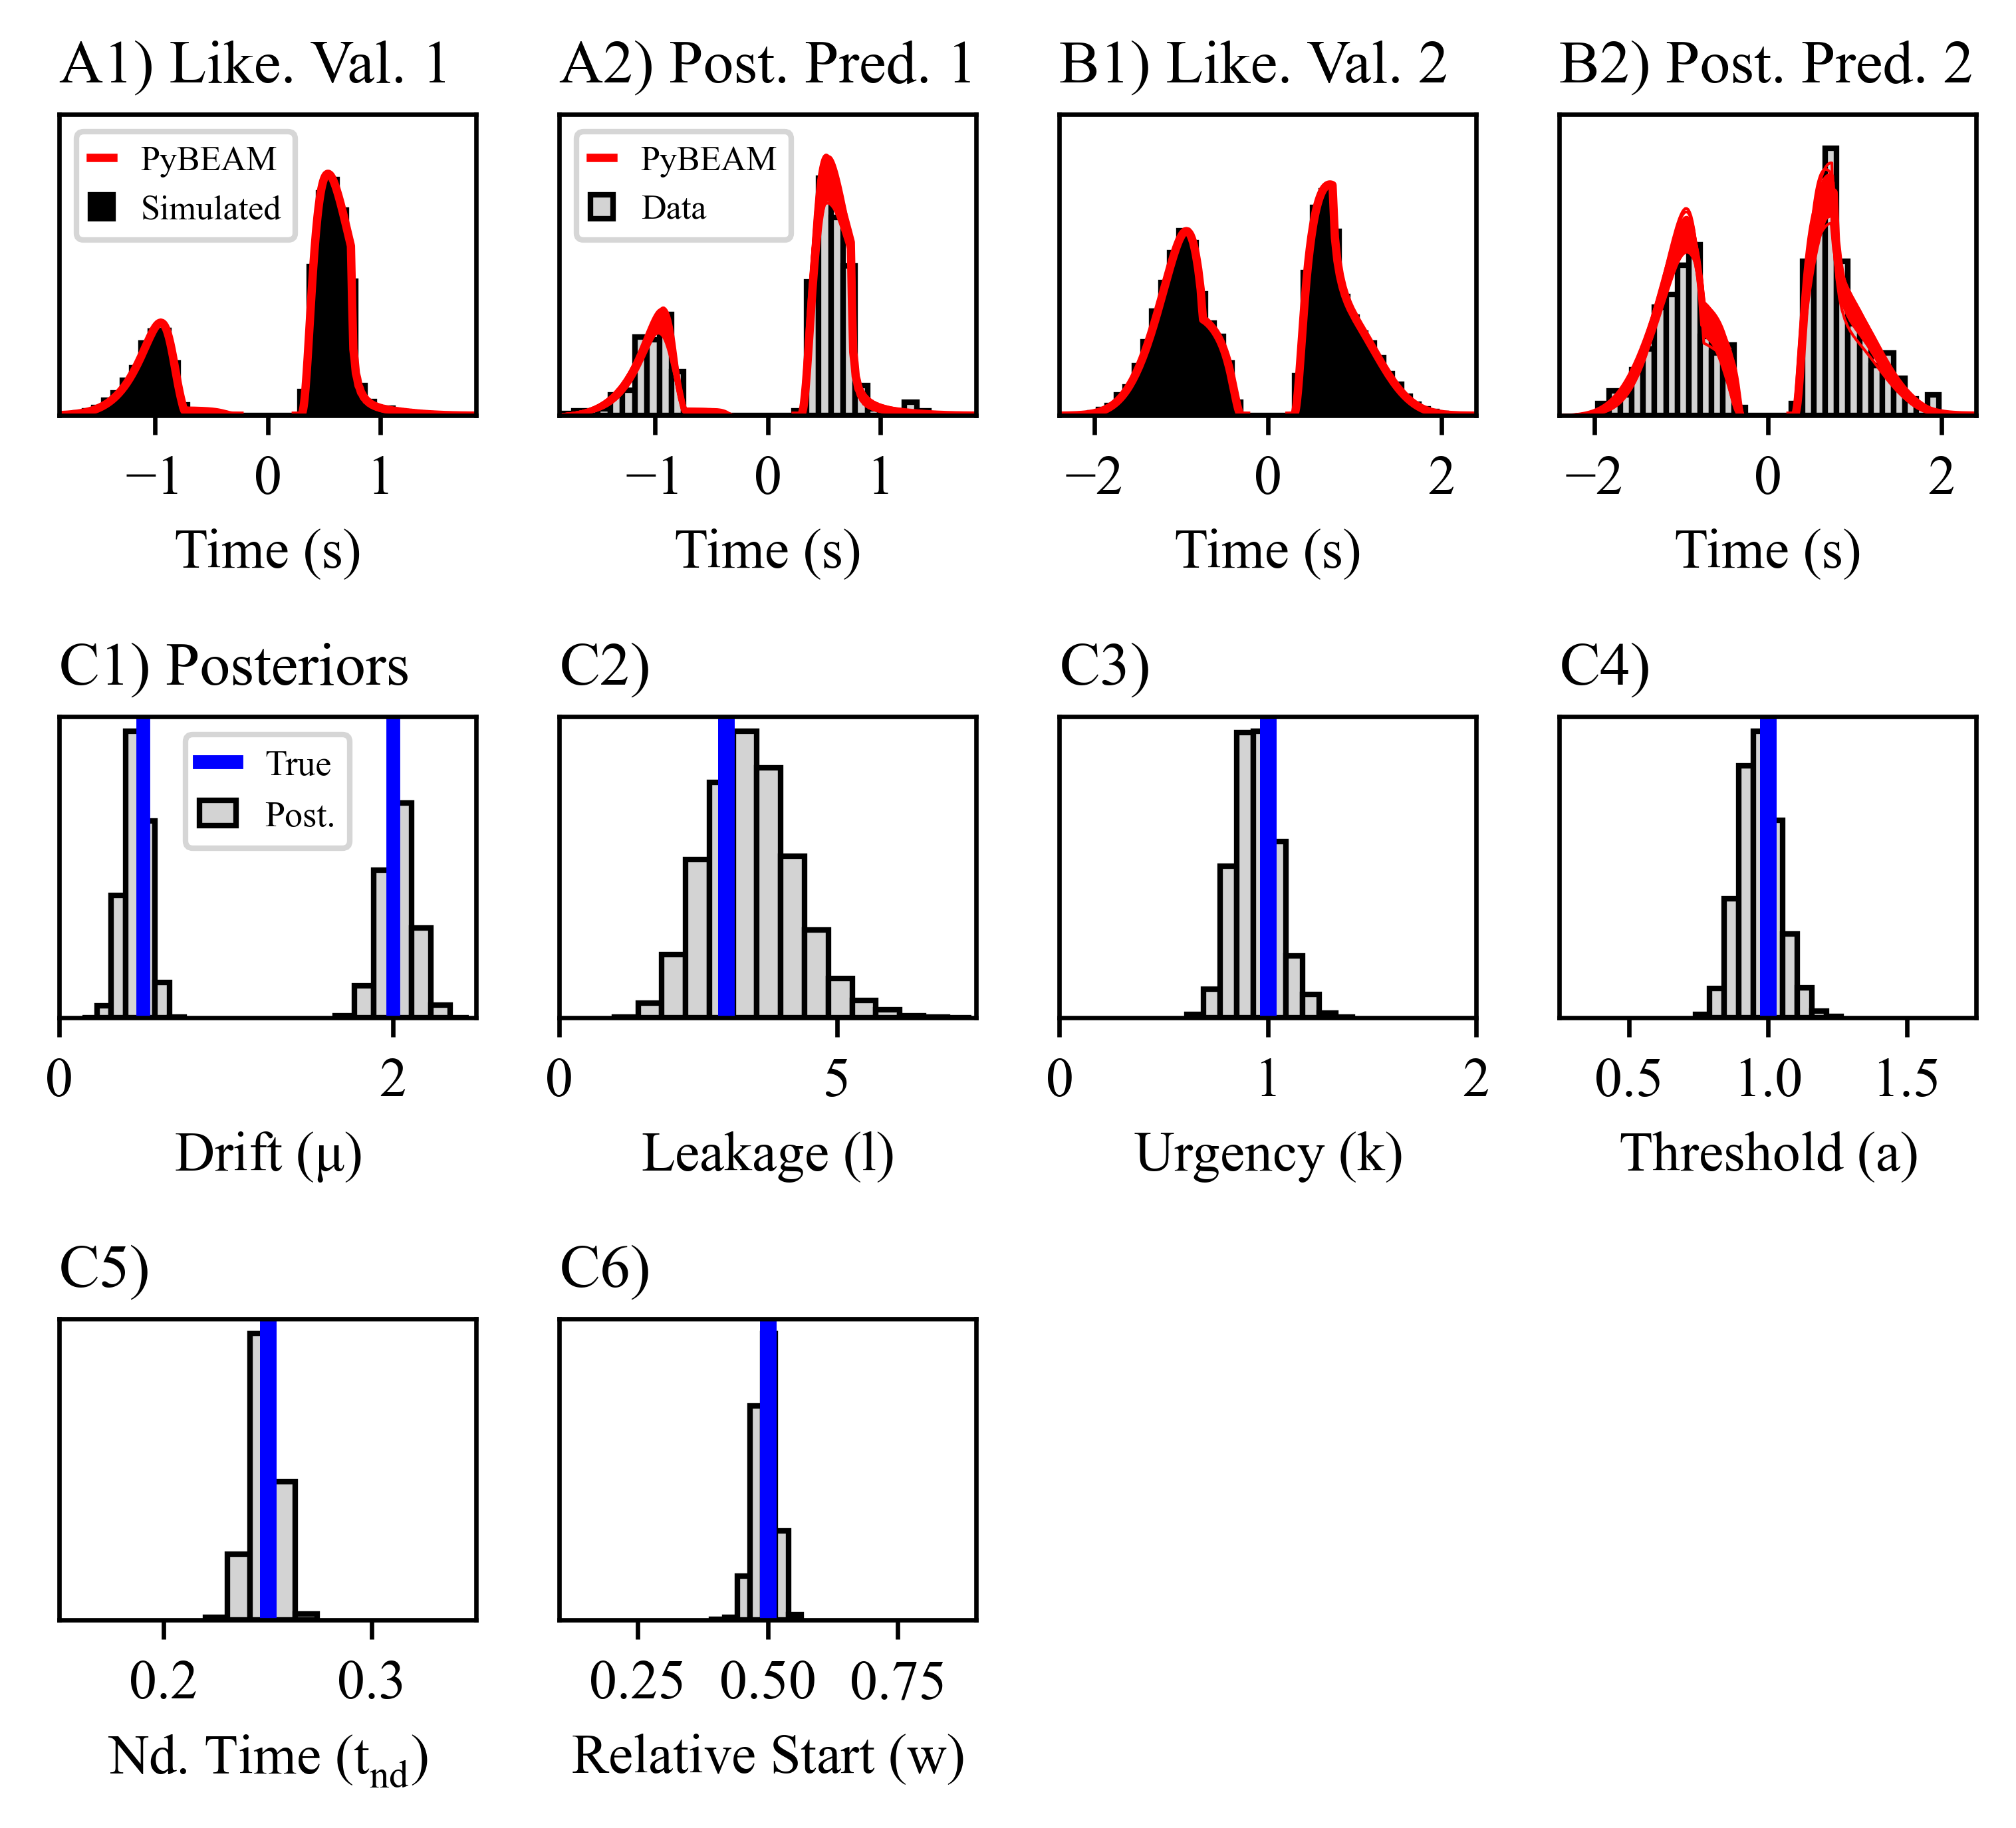

In [35]:
# define figure
fig, axs = plt.subplots(3, 4, figsize=(6.2, 5.0), dpi=600);
plt.subplots_adjust(hspace=1.0)

# import trace data
file_name = 'ugm_drift_flipping'
burnin = 25000
trace = az.from_netcdf(file_name + '.nc')
trace = trace.sel(draw=slice(burnin,None))
trace = trace.posterior.stack(draws=("chain", "draw"))

t_nd = trace.t_nd.values
w = trace.w.values
mu0 = trace.mu0.values
mu1 = trace.mu1.values
l = trace.l.values
k = trace.k.values
a = trace.a.values

# -------------------------------------------------- #
# generate panel [0,0]
# -------------------------------------------------- #

model_rt = pbc.model_rt(model_dir = model_dir, phi = phi1)
axs[0,0].plot(model_rt['time'], model_rt['model_rt_upper'], color = 'r')
axs[0,0].plot(-model_rt['time'], model_rt['model_rt_lower'], color = 'r', label = '_nolegend_')

rt_val_all = np.concatenate((rt_val1['rt_upper'], -rt_val1['rt_lower']))
axs[0,0].hist(rt_val_all, density = True, bins = 50, edgecolor = 'k', facecolor = 'black');
axs[0,0].set_xlim(-1.85, 1.85)
axs[0,0].set_ylim(0.0, 2.4)
axs[0,0].set_title('A1) Like. Val. 1', loc = 'left', fontsize = 11)
axs[0,0].set_xlabel('Time (s)')
axs[0,0].legend(['PyBEAM', 'Simulated'], fontsize = 6.25, handlelength = 0.65, loc = 'upper left')

# -------------------------------------------------- #
# generate panel [0,1]
# -------------------------------------------------- #

rt1_all = np.concatenate((rt1['rt_upper'], -rt1['rt_lower']))
axs[0,1].hist(rt1_all, density = True, bins = 30, edgecolor = 'k', facecolor = 'lightgrey');

N_pp = 100
for ii in range(N_pp):
    
    ind = np.random.randint(0, len(t_nd))
    t_nd_ind = t_nd[ind]
    w_ind = w[ind]
    mu_ind = mu1[ind]
    l_ind = l[ind]
    k_ind = k[ind]
    a_ind = a[ind] 

    phi_temp = {'phi[0]' : t_nd_ind,
                'phi[1]' : w_ind,
                'phi[2]' : mu_ind,
                'phi[3]' : l_ind,
                'phi[4]' : k_ind,    
                'phi[5]' : 1.0,
                'phi[6]' : a_ind,
                'phi[7]' : 0.5} 
       
    rt_model = pbc.model_rt(model_dir = model_dir, phi = phi_temp)
    if (ii == 0):
        axs[0,1].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r')
        axs[0,1].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label = '_nolegend_')
    else:
        axs[0,1].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r', linewidth = 0.5, label='_nolegend_')
        axs[0,1].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label='_nolegend_')
    
axs[0,1].set_xlim(-1.85, 1.85)
axs[0,1].set_ylim(0.0, 2.4)
axs[0,1].set_xlabel('Time (s)')
axs[0,1].set_title('A2) Post. Pred. 1', loc = 'left', fontsize = 11)
axs[0,1].legend(['PyBEAM', 'Data'], fontsize = 6.25, loc = 'upper left', handlelength = 0.65)

# -------------------------------------------------- #
# generate panel [0,2]
# -------------------------------------------------- #

model_rt = pbc.model_rt(model_dir = model_dir, phi = phi0)

axs[0,2].plot(model_rt['time'], model_rt['model_rt_upper'], color = 'r')
axs[0,2].plot(-model_rt['time'], model_rt['model_rt_lower'], color = 'r', label = '_nolegend_')

rt_val_all = np.concatenate((rt_val0['rt_upper'], -rt_val0['rt_lower']))
axs[0,2].hist(rt_val_all, density = True, bins = 50, edgecolor = 'k', facecolor = 'black');
axs[0,2].set_xlim(-2.4, 2.4)
axs[0,2].set_ylim(0.0, 1.1)
axs[0,2].set_title('B1) Like. Val. 2', loc = 'left', fontsize = 11)
axs[0,2].set_xlabel('Time (s)')

# -------------------------------------------------- #
# generate panel [0,3]
# -------------------------------------------------- #

rt0_all = np.concatenate((rt0['rt_upper'], -rt0['rt_lower']))
axs[0,3].hist(rt0_all, density = True, bins = 30, edgecolor = 'k', facecolor = 'lightgrey');

N_pp = 100
for ii in range(N_pp):
    
    ind = np.random.randint(0, len(t_nd))
    t_nd_ind = t_nd[ind]
    w_ind = w[ind]
    mu_ind = mu0[ind]
    l_ind = l[ind]
    k_ind = k[ind]
    a_ind = a[ind] 

    phi_temp = {'phi[0]' : t_nd_ind,
                'phi[1]' : w_ind,
                'phi[2]' : mu_ind,
                'phi[3]' : l_ind,
                'phi[4]' : k_ind,    
                'phi[5]' : 1.0,
                'phi[6]' : a_ind,
                'phi[7]' : 0.5} 
       
    rt_model = pbc.model_rt(model_dir = model_dir, phi = phi_temp)
    if (ii == 0):
        axs[0,3].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r')
        axs[0,3].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label = '_nolegend_')
    else:
        axs[0,3].plot(rt_model['time'], rt_model['model_rt_upper'], color = 'r', linewidth = 0.5, label='_nolegend_')
        axs[0,3].plot(-rt_model['time'], rt_model['model_rt_lower'], color = 'r', linewidth = 0.5, label='_nolegend_')
    
axs[0,3].set_xlim(-2.4, 2.4)
axs[0,3].set_ylim(0.0, 1.1)
axs[0,3].set_xlabel('Time (s)')
axs[0,3].set_title('B2) Post. Pred. 2', loc = 'left', fontsize = 11)

# -------------------------------------------------- #
# generate remaining panels
# -------------------------------------------------- #

axs[1,0].hist(mu0, density = True, bins = 7, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,0].hist(mu1, density = True, bins = 7, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,0].set_xlabel('Drift ($\mu$)')
axs[1,0].axvline(x=0.5, c = 'b', linewidth = 2.5)
axs[1,0].axvline(x=2.0, c = 'b', linewidth = 2.5, label = '_nolegend_')
axs[1,0].set_xlim(0.0, 2.5)
axs[1,0].set_title('C1) Posteriors', loc = 'left', fontsize = 11)
axs[1,0].legend(['True', 'Post.'], loc = 'upper center', fontsize = 6.5, handlelength = 1.0)

axs[1,1].hist(l, density = True, bins = 15, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,1].set_xlabel('Leakage ($l$)')
axs[1,1].axvline(x=3.0, c = 'b', linewidth = 3)
axs[1,1].set_title('C2)', loc = 'left', fontsize = 11)
axs[1,1].set_xlim(0.0, 7.5)

axs[1,2].hist(k, density = True, bins = 10, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,2].set_xlabel('Urgency ($k$)')
axs[1,2].axvline(x=1.0, c = 'b', linewidth = 3)
axs[1,2].set_title('C3)', loc = 'left', fontsize = 11)
axs[1,2].set_xlim(0.0, 2.0)

axs[1,3].hist(a, density = True, bins = 10, edgecolor = 'k', facecolor = 'lightgrey');
axs[1,3].set_xlabel('Threshold ($a$)')
axs[1,3].axvline(x=1.0, c = 'b', linewidth = 3)
axs[1,3].set_title('C4)', loc = 'left', fontsize = 11)
axs[1,3].set_xlim(0.25, 1.75)

axs[2,0].hist(t_nd, density = True, bins = 5, edgecolor = 'k', facecolor = 'lightgrey');
axs[2,0].set_xlabel('Nd. Time ($t_{nd}$)')
axs[2,0].axvline(x=0.25, c = 'b', linewidth = 3)
axs[2,0].set_title('C5)', loc = 'left', fontsize = 11)
axs[2,0].set_xlim(0.15, 0.35)

axs[2,1].hist(w, density = True, bins = 7, edgecolor = 'k', facecolor = 'lightgrey');
axs[2,1].set_xlabel('Relative Start ($w$)')
axs[2,1].axvline(x=0.5, c = 'b', linewidth = 3)
axs[2,1].set_title('C6)', loc = 'left', fontsize = 11)
axs[2,1].set_xlim(0.1, 0.9)

for ii in range(3):
    for jj in range(4):
        axs[ii,jj].set_yticklabels([])
        axs[ii,jj].set_yticks([])

axs[2,2].set_axis_off()
axs[2,3].set_axis_off()
        
plt.savefig('ugm_drift_flipping_full.pdf', bbox_inches = 'tight', dpi = 600)
        